In [1]:
from datasets import load_dataset
ds = load_dataset("neuralcatcher/hateful_memes")

d:\Anaconda\envs\Hatememes\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


In [2]:
print(ds)  # 显示数据集的基本信息
print(ds["train"][0])  # 显示训练集中的第一个样本

DatasetDict({
    train: Dataset({
        features: ['id', 'img', 'label', 'text'],
        num_rows: 8500
    })
    validation: Dataset({
        features: ['id', 'img', 'label', 'text'],
        num_rows: 1040
    })
    test: Dataset({
        features: ['id', 'img', 'label', 'text'],
        num_rows: 3000
    })
})
{'id': '42953', 'img': 'img/42953.png', 'label': 0, 'text': 'its their character not their color that matters'}


文本内容: oakland mayor libby schaaf i saved 800 ms-13 rapists, murderers, molesters from ice
标签: 0 (0=非仇恨, 1=仇恨)
图片ID: 46537


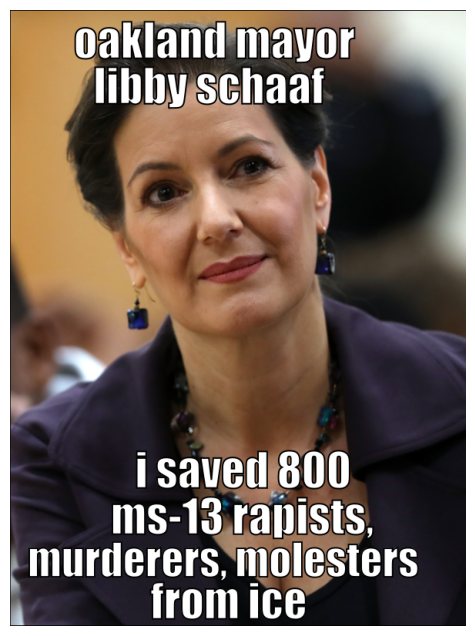

In [14]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os

def show_sample(dataset, split="train", index=0):
    """
    显示数据集中指定样本的图片和信息
    
    参数:
        dataset: 数据集对象
        split: 数据集分片 ("train", "validation", "test")
        index: 样本索引
    """
    # 获取样本
    sample = dataset[split][index]
    
    # 构建完整的图片URL
    base_url = "https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/"
    img_url = base_url + sample['img']
    
    # 获取并显示图片
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    
    # 使用matplotlib显示图片和文本
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    
    # 显示相关信息
    print(f"文本内容: {sample['text']}")
    print(f"标签: {sample['label']} (0=非仇恨, 1=仇恨)")
    print(f"图片ID: {sample['id']}")
    plt.show()

# 使用示例
show_sample(ds, "train", 80)

In [15]:
import os
import requests
from tqdm import tqdm
import shutil
def download_dataset_images(dataset, base_dir="data"):
    """
    从 Hugging Face 下载数据集中的所有图片到本地
    
    参数:
        dataset: 数据集对象
        base_dir: 基础保存目录
    """
    # 构建基础URL
    base_url = "https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/"
    
    # 创建目录结构
    splits = ["train", "validation", "test"]
    for split in splits:
        split_dir = os.path.join(base_dir, split, "img")
        os.makedirs(split_dir, exist_ok=True)
    
    # 下载每个分片的图片
    for split in splits:
        print(f"\n下载{split}集图片...")
        for item in tqdm(dataset[split]):
            # 获取图片文件名
            img_filename = item['img'].split('/')[-1]
            # 构建保存路径
            save_path = os.path.join(base_dir, split, "img", img_filename)
            
            # 如果文件已存在，跳过
            if os.path.exists(save_path):
                continue
                
            # 构建完整的图片URL
            img_url = base_url + item['img']
            
            try:
                # 下载图片
                response = requests.get(img_url, stream=True)
                response.raise_for_status()
                
                # 保存图片
                with open(save_path, 'wb') as f:
                    response.raw.decode_content = True
                    shutil.copyfileobj(response.raw, f)
            except Exception as e:
                print(f"\n下载失败 {img_filename}: {str(e)}")
                
    print("\n下载完成！")

# 使用示例，指定保存到项目目录下的 data 文件夹
download_dataset_images(ds, base_dir="d:/jupyter_doc/hateful_memes/data")


下载train集图片...


  0%|          | 2/8500 [00:03<3:27:09,  1.46s/it]


下载失败 23058.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/23058.png


  0%|          | 4/8500 [00:05<2:59:43,  1.27s/it]


下载失败 37408.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/37408.png


  0%|          | 13/8500 [00:23<3:40:19,  1.56s/it]


下载失败 25489.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/25489.png


  0%|          | 17/8500 [00:32<4:06:53,  1.75s/it]


下载失败 97628.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/97628.png


  0%|          | 18/8500 [00:32<3:17:12,  1.39s/it]


下载失败 14238.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/14238.png


  0%|          | 29/8500 [00:59<5:03:22,  2.15s/it]


下载失败 64318.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/64318.png


  0%|          | 34/8500 [01:12<5:46:48,  2.46s/it]


下载失败 25719.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/25719.png


  0%|          | 36/8500 [01:15<4:18:43,  1.83s/it]


下载失败 72598.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/72598.png


  0%|          | 37/8500 [01:15<3:27:37,  1.47s/it]


下载失败 43078.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/43078.png


  0%|          | 39/8500 [01:19<3:49:29,  1.63s/it]


下载失败 01569.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/01569.png


  0%|          | 41/8500 [01:22<3:38:57,  1.55s/it]


下载失败 06418.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/06418.png


  1%|          | 52/8500 [01:42<3:32:02,  1.51s/it]


下载失败 48279.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/48279.png


  1%|          | 66/8500 [02:13<4:10:48,  1.78s/it]


下载失败 20619.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/20619.png


  1%|          | 68/8500 [02:15<3:31:06,  1.50s/it]


下载失败 81059.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/81059.png


  1%|          | 74/8500 [02:27<3:39:22,  1.56s/it]


下载失败 12548.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/12548.png


  1%|          | 79/8500 [02:38<4:15:14,  1.82s/it]


下载失败 40259.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/40259.png


  1%|          | 94/8500 [03:10<4:36:19,  1.97s/it]


下载失败 53289.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/53289.png


  1%|          | 105/8500 [03:36<5:13:45,  2.24s/it]


下载失败 34508.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/34508.png


  1%|▏         | 109/8500 [03:46<5:30:11,  2.36s/it]


下载失败 25468.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/25468.png


  1%|▏         | 111/8500 [03:50<4:51:28,  2.08s/it]


下载失败 96258.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/96258.png


  1%|▏         | 112/8500 [03:51<4:00:18,  1.72s/it]


下载失败 96578.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/96578.png


  1%|▏         | 113/8500 [03:51<3:19:45,  1.43s/it]


下载失败 35618.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/35618.png


  1%|▏         | 114/8500 [03:52<2:59:50,  1.29s/it]


下载失败 05249.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/05249.png


  1%|▏         | 115/8500 [03:53<2:32:02,  1.09s/it]


下载失败 57349.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/57349.png


  1%|▏         | 116/8500 [03:54<2:13:59,  1.04it/s]


下载失败 78409.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/78409.png


  1%|▏         | 118/8500 [03:56<2:31:17,  1.08s/it]


下载失败 20568.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/20568.png


  1%|▏         | 119/8500 [03:57<2:15:47,  1.03it/s]


下载失败 84269.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/84269.png


  1%|▏         | 120/8500 [03:58<2:02:05,  1.14it/s]


下载失败 68079.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/68079.png


  2%|▏         | 128/8500 [04:16<4:58:34,  2.14s/it]


下载失败 12348.png: 404 Client Error: Not Found for url: https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/img/12348.png


  2%|▏         | 130/8500 [04:22<4:41:21,  2.02s/it]


KeyboardInterrupt: 

数据集分片: train
样本索引: 69
文本内容: what's the difference between a jew and a pizza? a pizza doesn't scream when you put it in the oven
标签: 1 (0=非仇恨, 1=仇恨)
图片ID: 74530


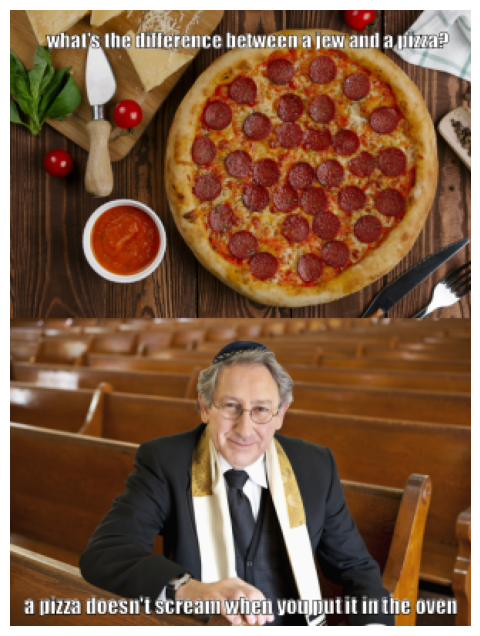

In [20]:
def show_sample_by_id(dataset, sample_id, splits=["train", "validation", "test"]):
    """
    通过ID显示数据集中的样本信息
    
    参数:
        dataset: 数据集对象
        sample_id: 样本ID
        splits: 要搜索的数据集分片列表
    """
    # 在所有分片中查找指定ID的样本
    found = False
    for split in splits:
        # 查找匹配ID的样本索引
        matches = [i for i, item in enumerate(dataset[split]) if str(item['id']) == str(sample_id)]
        
        if matches:
            found = True
            index = matches[0]
            sample = dataset[split][index]
            
            # 构建完整的图片URL
            base_url = "https://huggingface.co/datasets/neuralcatcher/hateful_memes/resolve/main/"
            img_url = base_url + sample['img']
            
            try:
                # 获取并显示图片
                response = requests.get(img_url)
                img = Image.open(BytesIO(response.content))
                
                # 使用matplotlib显示图片和文本
                plt.figure(figsize=(10, 8))
                plt.imshow(img)
                plt.axis('off')
                
                # 显示相关信息
                print(f"数据集分片: {split}")
                print(f"样本索引: {index}")
                print(f"文本内容: {sample['text']}")
                print(f"标签: {sample['label']} (0=非仇恨, 1=仇恨)")
                print(f"图片ID: {sample['id']}")
                plt.show()
                break
                
            except Exception as e:
                print(f"加载图片时出错: {e}")
    
    if not found:
        print(f"未找到ID为 {sample_id} 的样本")

# 使用示例
show_sample_by_id(ds, "74530")  